# 保存したデータを取り出す

### CSVファイルを読み込む

In [1]:
import pandas as pd

In [2]:
csv_file_name = "estat_bread_consumption_2021090718.csv" # 読み込むファイルに合わせて変更する

In [3]:
df = pd.read_csv(csv_file_name, encoding="cp932")

In [4]:
df.head()

,tab_code,表章項目,cat01_code,品目分類（2020年改定）,cat02_code,世帯区分,area_code,地域区分,time_code,時間軸（月次）,unit,value
0,1,金額,10120000,1.1.2 パン,3,二人以上の世帯（2000年〜）,0,全国,2000000101,2000年1月,円,2127
1,1,金額,10120000,1.1.2 パン,3,二人以上の世帯（2000年〜）,0,全国,2000000202,2000年2月,円,2329
2,1,金額,10120000,1.1.2 パン,3,二人以上の世帯（2000年〜）,0,全国,2000000303,2000年3月,円,2492
3,1,金額,10120000,1.1.2 パン,3,二人以上の世帯（2000年〜）,0,全国,2000000404,2000年4月,円,2441
4,1,金額,10120000,1.1.2 パン,3,二人以上の世帯（2000年〜）,0,全国,2000000505,2000年5月,円,2458


In [5]:
df.tail()

,tab_code,表章項目,cat01_code,品目分類（2020年改定）,cat02_code,世帯区分,area_code,地域区分,time_code,時間軸（月次）,unit,value
9917,1,金額,10120000,1.1.2 パン,2,"二人以上の世帯のうち勤労者世帯（農林漁家世帯を除く）（1985年〜2007年,2017年）",0,全国,2017000808,2017年8月,円,2549
9918,1,金額,10120000,1.1.2 パン,2,"二人以上の世帯のうち勤労者世帯（農林漁家世帯を除く）（1985年〜2007年,2017年）",0,全国,2017000909,2017年9月,円,2537
9919,1,金額,10120000,1.1.2 パン,2,"二人以上の世帯のうち勤労者世帯（農林漁家世帯を除く）（1985年〜2007年,2017年）",0,全国,2017001010,2017年10月,円,2668
9920,1,金額,10120000,1.1.2 パン,2,"二人以上の世帯のうち勤労者世帯（農林漁家世帯を除く）（1985年〜2007年,2017年）",0,全国,2017001111,2017年11月,円,2670
9921,1,金額,10120000,1.1.2 パン,2,"二人以上の世帯のうち勤労者世帯（農林漁家世帯を除く）（1985年〜2007年,2017年）",0,全国,2017001212,2017年12月,円,2807


### 必要な列だけを抽出する

In [6]:
df = df[["area_code", "time_code", "value"]]

In [7]:
df.head()

,area_code,time_code,value
0,0,2000000101,2127
1,0,2000000202,2329
2,0,2000000303,2492
3,0,2000000404,2441
4,0,2000000505,2458


# データを整形する

### 欠損値に対応する

In [8]:
df.isnull()

,area_code,time_code,value
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
9917,False,False,False
9918,False,False,False
9919,False,False,False
9920,False,False,False


In [9]:
df.isnull().any()

area_code    False
time_code    False
value        False
dtype: bool

In [10]:
df["value"].sort_values()

1305       -
1304       -
802     1099
1154    1418
1329    1418
        ... 
4736    3799
8646    3804
4531    3865
5753    4020
8699    4179
Name: value, Length: 9922, dtype: object

In [11]:
df["value"].replace("-", "0", inplace=True)

In [12]:
df["value"].sort_values().head()

1305       0
1304       0
802     1099
1154    1418
1329    1418
Name: value, dtype: object

### データ型を変換する

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9922 entries, 0 to 9921
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   area_code  9922 non-null   int64 
 1   time_code  9922 non-null   int64 
 2   value      9922 non-null   object
dtypes: int64(2), object(1)
memory usage: 232.7+ KB


In [14]:
df = df.astype({"area_code": str, "time_code": str, "value": int})

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9922 entries, 0 to 9921
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   area_code  9922 non-null   object
 1   time_code  9922 non-null   object
 2   value      9922 non-null   int32 
dtypes: int32(1), object(2)
memory usage: 193.9+ KB


In [16]:
df["time_code"] = df["time_code"].str[:4] + df["time_code"].str[-2:]

In [17]:
df["time_code"]

0       200001
1       200002
2       200003
3       200004
4       200005
         ...  
9917    201708
9918    201709
9919    201710
9920    201711
9921    201712
Name: time_code, Length: 9922, dtype: object

In [18]:
df["time_code"] = pd.to_datetime(df["time_code"], format="%Y%m")

In [19]:
df["time_code"]

0      2000-01-01
1      2000-02-01
2      2000-03-01
3      2000-04-01
4      2000-05-01
          ...    
9917   2017-08-01
9918   2017-09-01
9919   2017-10-01
9920   2017-11-01
9921   2017-12-01
Name: time_code, Length: 9922, dtype: datetime64[ns]

In [20]:
df.head()

,area_code,time_code,value
0,0,2000-01-01,2127
1,0,2000-02-01,2329
2,0,2000-03-01,2492
3,0,2000-04-01,2441
4,0,2000-05-01,2458


### 整形したデータを保存する

In [21]:
csv_file_name_new = csv_file_name.split(".")[0] + "_revised.csv"

In [22]:
df.to_csv(csv_file_name_new, header=True, index=False)

## グラフに表示する

### 必要な行だけを取り出す

In [23]:
df["area_code"] == "13003"

0       False
1       False
2       False
3       False
4       False
        ...  
9917    False
9918    False
9919    False
9920    False
9921    False
Name: area_code, Length: 9922, dtype: bool

In [24]:
df_tokyo = df[df["area_code"] == "13003"] 

In [25]:
df_tokyo.head()

,area_code,time_code,value
2263,13003,2007-09-01,2275
2264,13003,2007-10-01,2487
2265,13003,2007-11-01,2425
2266,13003,2007-12-01,2458
2267,13003,2008-01-01,2323


In [26]:
df_tokyo.rename(columns={"value": "tokyo_value"}, inplace=True)

C:\Users\tomoy\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [27]:
df_tokyo.drop("area_code", axis=1, inplace=True)

C:\Users\tomoy\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [28]:
df_tokyo.set_index("time_code", inplace=True)

In [29]:
df_tokyo.head()

,tokyo_value
time_code,
2007-09-01,2275
2007-10-01,2487
2007-11-01,2425
2007-12-01,2458
2008-01-01,2323


In [30]:
df_kyoto = df[df["area_code"] == "26003"] 

In [31]:
df_kyoto.rename(columns={"value": "kyoto_value"}, inplace=True)

C:\Users\tomoy\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [32]:
df_kyoto.drop("area_code", axis=1, inplace=True)

C:\Users\tomoy\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [33]:
df_kyoto.set_index("time_code", inplace=True)

In [34]:
df_kyoto.head()

,kyoto_value
time_code,
2007-09-01,2651
2007-10-01,2858
2007-11-01,2798
2007-12-01,2635
2008-01-01,2676


### データフレームを結合する

In [35]:
df_all = pd.concat([df_tokyo, df_kyoto], axis=1)

In [36]:
df_all.head()

,tokyo_value,kyoto_value
time_code,,
2007-09-01,2275,2651
2007-10-01,2487,2858
2007-11-01,2425,2798
2007-12-01,2458,2635
2008-01-01,2323,2676


### 統計値を取得する

In [37]:
df_all.describe()

,tokyo_value,kyoto_value
count,167.000000,167.000000
mean,2752.868263,3071.059880
std,239.975489,322.466001
min,2080.000000,2285.000000
25%,2580.500000,2816.500000
50%,2744.000000,3080.000000
75%,2886.000000,3312.000000
max,3290.000000,3865.000000


### グラフに表示する

<AxesSubplot:title={'center':'Bread Consumption'}, xlabel='time_code'>

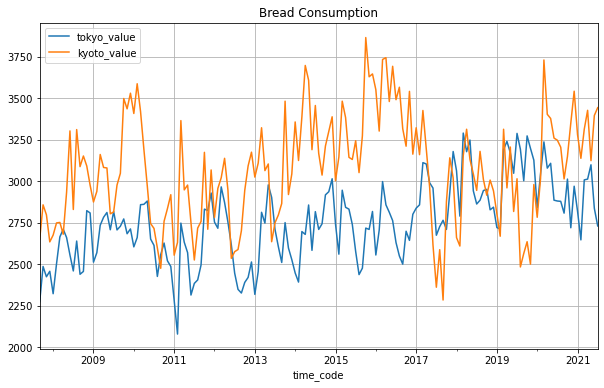

In [38]:
df_all.plot(title="Bread Consumption",grid=True,figsize=(10,6))